In [168]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import seaborn as sns
from scipy.stats import ttest_rel
import re

import matplotlib.pyplot as plt
from pylab import rcParams

import scipy



In [152]:
latest_data=pd.read_excel('Blood Group and Covid Mortality Rate.xlsx')

In [153]:
latest_data.tail()

,Country/Dependency,Population[1],O+,A+,B+,AB+,O−,A−,B−,AB−,Total A,"Country,",cases per mil,deaths per mil
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,World,903.0,51.7
215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yemen,16.0,4.0
216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zambia,59.0,0.4
217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zimbabwe,19.0,0.3
218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total:,902.8,51.7


In [145]:
latest_data.iat[12,0]

'\xa0Cameroon'

In [146]:
latest_data['Country/Dependency'] = latest_data['Country/Dependency'].apply(remov)

AttributeError: 'float' object has no attribute 'strip'

In [129]:
def remov(row):
    temp=row.strip()
    return temp

In [71]:
for i in latest_data['Country/Dependency']:
    print(i)

Argentina
Armenia
Australia
Austria
Bahrain
Bangladesh
Belgium
Bolivia
Bosnia and Herzegovina
Brazil
Bulgaria
Cambodia
Cameroon
Canada
Chile
China, Mainland
Colombia
Croatia
Cuba
Cyprus
Czech Republic
Democratic Republic of the Congo
Denmark
Dominican Republic
Ecuador
Egypt
El Salvador
Estonia
Ethiopia
Fiji
Finland
France
Germany
Ghana
Greece
Guinea
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Ivory Coast
Jamaica
Japan
Kazakhstan
Kenya
Latvia
Lebanon
Libya
Liechtenstein
Lithuania
Luxemburg
Macao
Malaysia
Malta
Mauritania
Mauritius
Mexico
Moldova
Mongolia
Morocco
Myanmar
Nepal
Netherlands
New Zealand
Nigeria
North Korea
North Macedonia
Norway
Pakistan
Papua New Guinea
Peru
Philippines
Poland
Portugal
Romania
Russia
Saudi Arabia
Serbia
Singapore
Slovakia
Slovenia
South Africa
South Korea
Spain
Sudan
Sweden
Switzerland
Syria
Taiwan
Thailand
Turkey
Uganda
Ukraine
United Arab Emirates
United Kingdom
United States
Venezuela
Vietnam
Yemen
Zimbabwe
nan
nan


In [91]:
df1=latest_data[['Country/Dependency','Population[1]','O+',
                'A+','B+','AB+','O−',
                'A−','B−','AB−','Total A']]


In [100]:
df1.columns=['country','Population','O+',
                'A+','B+','AB+','O−',
                'A−','B−','AB−','Total A']


In [110]:
df1['country']=df1['country'].apply(removeSQ)

In [154]:
df2=latest_data[['Country,','cases per mil','deaths per mil']]

In [155]:
df2.columns=['country','cases per mil','deaths per mil']

In [156]:
final=pd.merge(df1,df2)

In [157]:
final

,country,Population,O+,A+,B+,AB+,O−,A−,B−,AB−,Total A,cases per mil,deaths per mil
0,Argentina,44270440.0,0.4540,0.3426,0.0859,0.0264,0.0840,0.0044,0.0021,0.0006,0.3470,488.0,15.0
1,Armenia,2931568.0,0.2900,0.4630,0.1200,0.0560,0.0200,0.0370,0.0100,0.0040,0.5000,4431.0,68.0
2,Australia,24642693.0,0.4000,0.3100,0.0800,0.0200,0.0900,0.0700,0.0200,0.0100,0.3800,285.0,4.0
3,Austria,8592470.0,0.3000,0.3700,0.1200,0.0500,0.0600,0.0700,0.0200,0.0100,0.4400,1877.0,75.0
4,Bahrain,1418695.0,0.4848,0.1935,0.2261,0.0367,0.0327,0.0133,0.0104,0.0025,0.2068,8701.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,United Kingdom,65512375.0,0.3800,0.3200,0.0800,0.0300,0.0900,0.0700,0.0200,0.0100,0.3900,4217.0,597.0
96,Venezuela,32011082.0,0.5830,0.2820,0.0560,0.0190,0.0370,0.0180,0.0040,0.0010,0.3000,81.0,0.8
97,Vietnam,95414640.0,0.4170,0.2190,0.3080,0.0498,0.0030,0.0010,0.0020,0.0002,0.2200,3.0,NaN
98,Yemen,29246429.0,0.4784,0.2750,0.1532,0.0214,0.0366,0.0210,0.0117,0.0016,0.2960,16.0,4.0


In [130]:
df1['country']=df1['country'].apply(remov)

In [158]:
# df1.iat[0,0]
final.to_csv('corr.csv',index=False,encoding='utf-8')

In [159]:
final.to_excel('test.xlsx',index=False)

In [170]:
p_corr=final.corr(method='pearson')

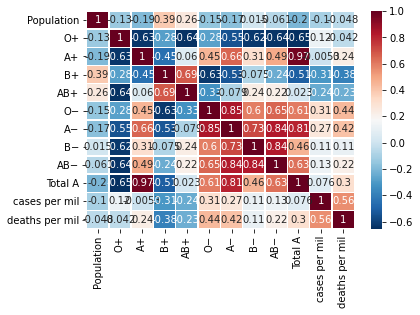

In [172]:
sns.heatmap(p_corr,xticklabels=p_corr.columns,
            yticklabels=p_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

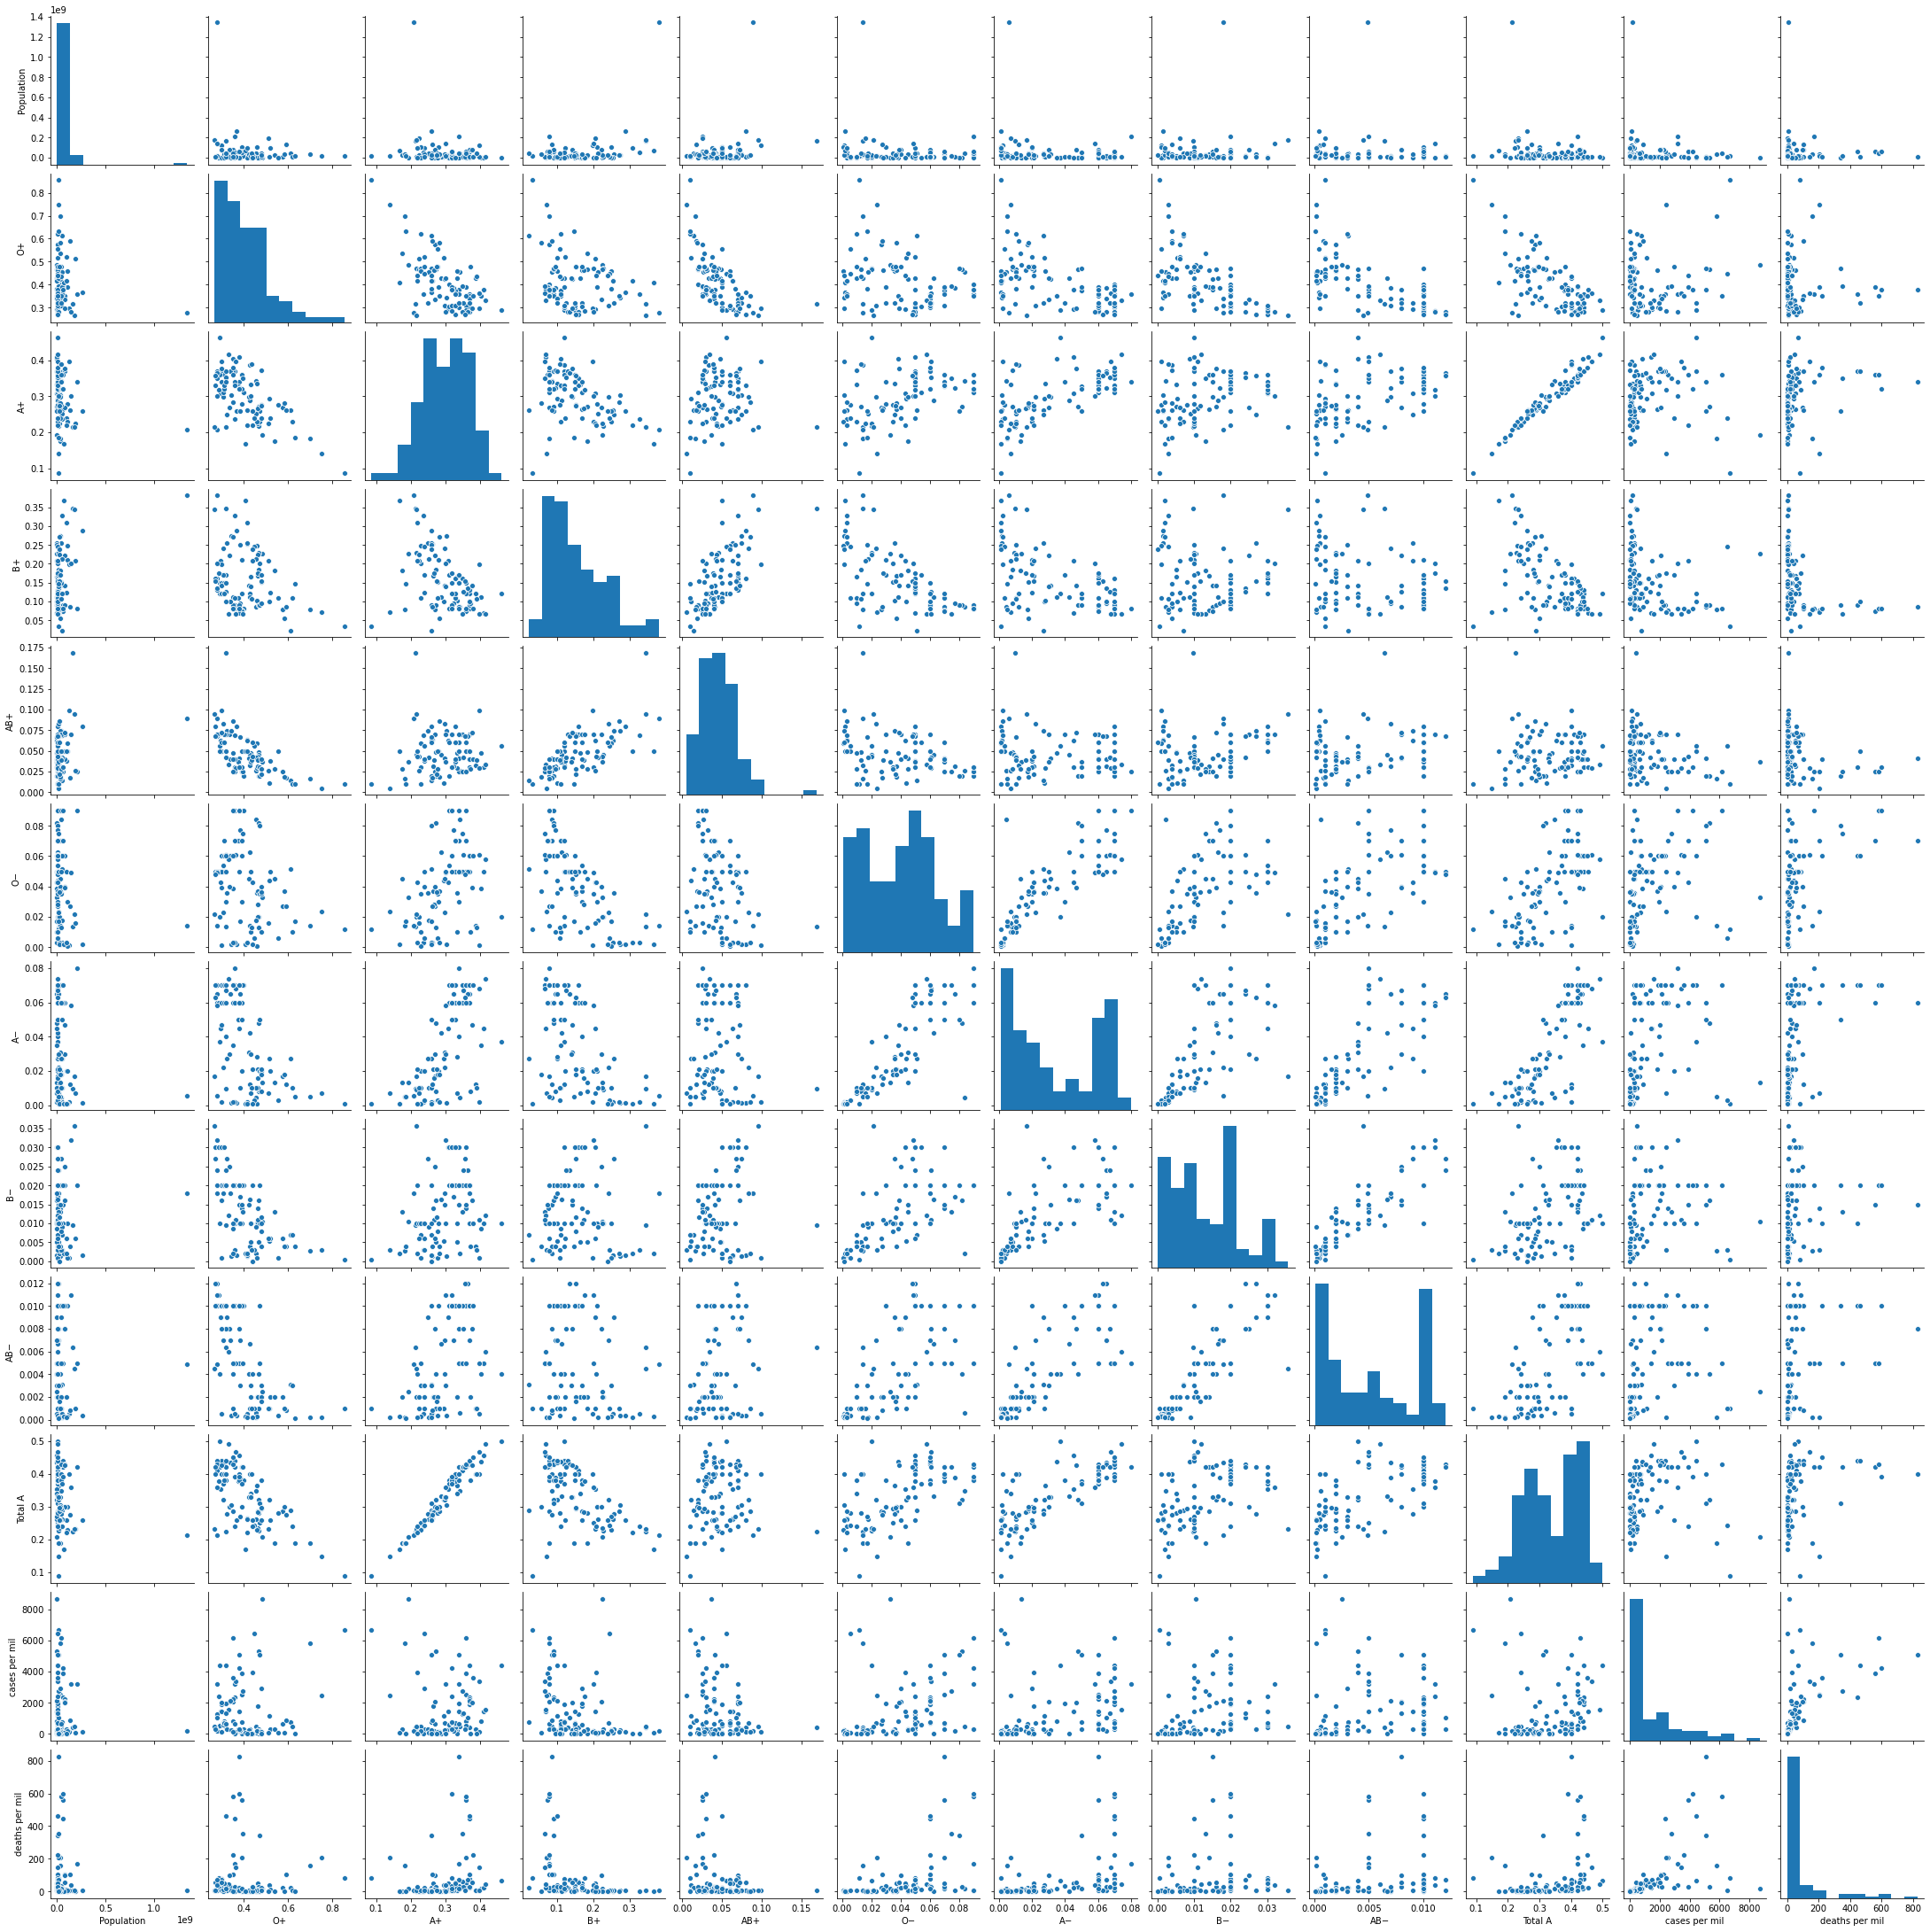

In [173]:
sns.pairplot(final)